##Import and Read in Data

In [ ]:
# imports

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import math
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression

      
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler 

from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#df = pd.read_csv('csgo_round_snapshots.csv')
df = pd.read_csv('/content/drive/MyDrive/DS4400/csgo_round_snapshots.csv')

In [ ]:
df.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_bizon,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,ct_weapon_g3sg1,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_glock,t_weapon_glock,ct_weapon_m249,t_weapon_m249,ct_weapon_m4a1s,t_weapon_m4a1s,...,t_weapon_p90,ct_weapon_r8revolver,t_weapon_r8revolver,ct_weapon_sawedoff,t_weapon_sawedoff,ct_weapon_scar20,t_weapon_scar20,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,t_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,4000.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,650.0,0.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,10750.0,0.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  bool   
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

##Preprocess the Data

In [ ]:
Xs = df.iloc[:, :-1]
Xs['map'] = LabelEncoder().fit_transform(np.array(Xs['map']))
Xs['bomb_planted'] = Xs['bomb_planted'].astype(int)

y = np.array(df.iloc[:, -1])
y = LabelEncoder().fit_transform(y)


In [ ]:
scaler = StandardScaler().fit(Xs.values)
features = scaler.transform(Xs.values)

X = pd.DataFrame(features, columns = Xs.columns)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
y_train = y_train.ravel()
y_test = y_test.ravel()

##Try Different Classifiers

In [ ]:
classEst =  {  "KNN": KNeighborsClassifier(n_neighbors=int(math.sqrt(X_train.shape[0]))),
              "Logistic Regression" : LogisticRegression(max_iter = 2000),
              "Linear SVC": LinearSVC(max_iter=10000),
              "Linear SVM with polynomial kernel": SVC(kernel='poly'),
              "Linear SVM with rbf kernel": SVC(kernel='rbf'),
              "Linear SVM with sigmoid kernel": SVC(kernel='sigmoid'),
              "Linear SVM with linear kernel": SVC(kernel='linear')
            }

In [ ]:
def classifiers_percentage_split():
  for key, value in classEst.items():

    value.fit(X_train, y_train)
    predicted_train = value.predict(X_train)
    predicted_test = value.predict(X_test)

    print(key)
    print("\tAccuracy score for training set: ",value.score(X_train, y_train))
    print("\tPrecision score for training set:" , precision_score(y_train, predicted_train))
    print("\tRecall score for training set:" , recall_score(y_train, predicted_train))
    print("\tF1 score for training set:" , f1_score(y_train, predicted_train))
    print()

    print("\tAccuracy Score for testing set: ",value.score(X_test, y_test))
    print("\tPrecision score for testing set:" , precision_score(y_test, predicted_test))
    print("\tRecall score for testing set:" , recall_score(y_test, predicted_test))
    print("\tF1 score for testing set:" , f1_score(y_test, predicted_test))
    

In [ ]:
classifiers_percentage_split()
# little typo - second set of stats is for the testing set

KNN
	Accuracy score for training set:  0.7481673510734476
	Precision score for training set: 0.7812752411270014
	Recall score for training set: 0.7027136752136752
	F1 score for training set: 0.7399149548900937

	Accuracy Score for testing set:  0.7451557036891808
	Precision score for training set: 0.7741414425170307
	Recall score for training set: 0.7063308983724209
	F1 score for training set: 0.7386831965153292
Logistic Regression
	Accuracy score for training set:  0.7492457002189375
	Precision score for training set: 0.7593752045201684
	Recall score for training set: 0.7437820512820513
	F1 score for training set: 0.7514977493280368

	Accuracy Score for testing set:  0.7494036532366108
	Precision score for training set: 0.7577115397103708
	Recall score for training set: 0.7476611559656542
	F1 score for training set: 0.7526527979358167


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Linear SVC
	Accuracy score for training set:  0.7502042327927064
	Precision score for training set: 0.7621537312449199
	Recall score for training set: 0.7413247863247864
	F1 score for training set: 0.7515949783906154

	Accuracy Score for testing set:  0.7497630951213933
	Precision score for training set: 0.7602147721320063
	Recall score for training set: 0.7439446366782007
	F1 score for training set: 0.7519917093075976
Linear SVM with polynomial kernel
	Accuracy score for training set:  0.8174431143594715
	Precision score for training set: 0.8542285741238621
	Recall score for training set: 0.7739529914529915
	F1 score for training set: 0.8121118360574876

	Accuracy Score for testing set:  0.7894977616573539
	Precision score for training set: 0.822086320821032
	Recall score for training set: 0.7493912597718826
	F1 score for training set: 0.7840573880396889
Linear SVM with rbf kernel
	Accuracy score for training set:  0.8107116015118673
	Precision score for training set: 0.85432824317163

In [ ]:
# naive bayes classifier

bayes = GaussianNB()
bayes.fit(X_train, y_train)
predicted_train = bayes.predict(X_train)
predicted_test = bayes.predict(X_test)


print("Naive Bayes Classifier")
print("\tAccuracy score for training set: ",bayes.score(X_train, y_train))
print("\tPrecision score for training set:" , precision_score(y_train, predicted_train))
print("\tRecall score for training set:" , recall_score(y_train, predicted_train))
print("\tF1 score for training set:" , f1_score(y_train, predicted_train))
print()

print("\tAccuracy Score for testing set: ", bayes.score(X_test, y_test))
print("\tPrecision score for testing set:" , precision_score(y_test, predicted_test))
print("\tRecall score for testing set:" , recall_score(y_test, predicted_test))
print("\tF1 score for testing set:" , f1_score(y_test, predicted_test))

Naive Bayes Classifier
	Accuracy score for training set:  0.5270077445074994
	Precision score for training set: 0.5188489926418067
	Recall score for training set: 0.9789086397570002
	F1 score for training set: 0.6782215635420525

	Accuracy Score for testing set:  0.5275626572558246
	Precision score for testing set: 0.5203655263783674
	Recall score for testing set: 0.9783483425943668
	F1 score for testing set: 0.6793808488934227


## Recursive Feature Elimination + K-Fold Cross Validation

In [ ]:

def RFE_feature_selection():
  estimator = DecisionTreeRegressor(random_state=3000)

  selector = RFE(estimator, n_features_to_select=5)
  selector = selector.fit(X_train.values, y_train)

  
  print("Ideal features after RFE:")
  for x in Xs.columns[selector.get_support()]:
    print(x)

  X_train_selected = selector.transform(X_train)
  X_test_selected = selector.transform(X_test)


  model = LogisticRegression(max_iter=10000)
  scores_train = cross_val_score(model, X_train, y_train, cv = 5, n_jobs=-1)
  scores_test = cross_val_score(model, X_test, y_test, cv = 5, n_jobs=-1)

  print("Original Results:")
  print("\tAverage accuracy for training set: ", scores_train.mean())
  print("\tAverage accuracy for testing set: ", scores_test.mean())

  scores_train = cross_val_score(model, X_train_selected, y_train, cv = 5, n_jobs=-1)
  scores_test = cross_val_score(model, X_test_selected, y_test, cv = 5, n_jobs=-1)
  
  print("With selected features: ")
  print("\tAccuracy for training set: " , scores_train.mean())
  print("\tAccuracy for testing set: " , scores_test.mean())


  return selector

In [ ]:
selector = RFE_feature_selection()

Ideal features after RFE:
time_left
ct_armor
t_armor
ct_money
t_money


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but RFE was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but RFE was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Original Results:
	Average accuracy for training set:  0.7488752991809017
	Average accuracy for testing set:  0.7476395575929005
With selected features: 
	Accuracy for training set:  0.7360658656333189
	Accuracy for testing set:  0.7338501067256942


##Grid Search CV


In [ ]:
@ignore_warnings(category=ConvergenceWarning)
def grid_search_LogReg():

  param_grid = {'penalty': ['l1', 'l2'], 'C': [.01, .001, .1, .5, 1]}
  grid_search = GridSearchCV(LogisticRegression(max_iter=1000, solver='saga'), param_grid, cv=5)

  grid_search.fit(X_train, y_train)

  print("Best params: ", grid_search.best_params_)
  print("training set accuracy score with best params:", grid_search.score(X_train, y_train))
  print("test set accuracy score with best params:", grid_search.score(X_test, y_test))

  return grid_search

@ignore_warnings(category=ConvergenceWarning)
def cross_val_score_on_best_params(C, penalty):

  model = LogisticRegression(C=C, penalty=penalty, max_iter=10000)
  scores_train = cross_val_score(model, X_train, y_train, cv = 5, n_jobs=-1)
  scores_test = cross_val_score(model, X_test, y_test, cv = 5, n_jobs=-1)

  print("Cross Validation Score with best params on training data: ", scores_train.mean())
  print("Cross Validation Score with best params on test data: ", scores_test.mean())

    

In [14]:
grid = grid_search_LogReg()

Best params:  {'C': 0.001, 'penalty': 'l2'}
training set accuracy score with best params: 0.7499319224024312
test set accuracy score with best params: 0.7487827990719864


In [24]:
params = list(grid.best_params_.values())
params

[0.001, 'l2']

In [26]:
cross_val_score_on_best_params(params[0], params[1])

Cross Validation Score with best params on training data:  0.749757665760838
Cross Validation Score with best params on test data:  0.7503838174163093


##Plotting data

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but RFE was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but RFE was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


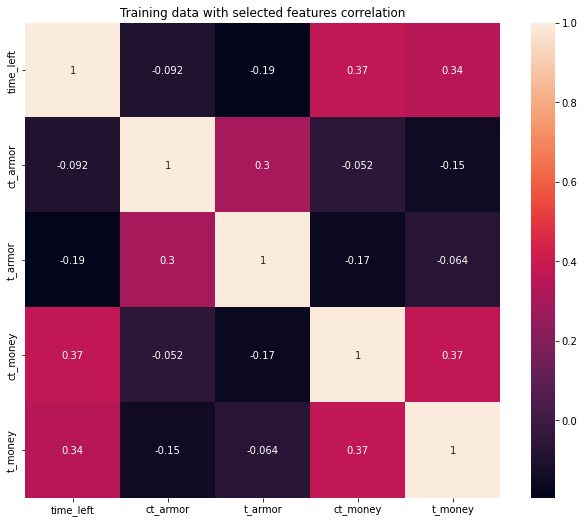

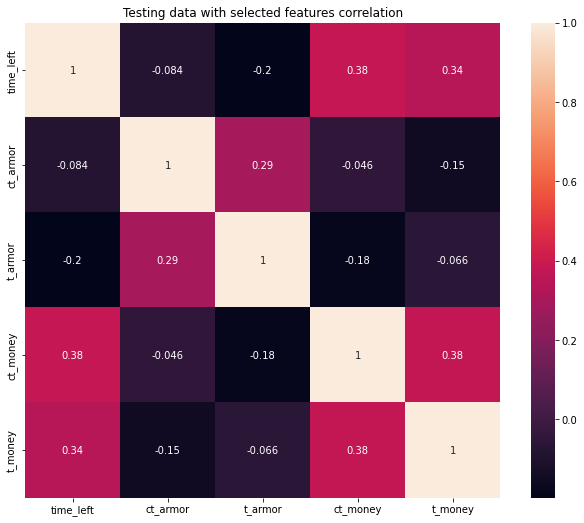

In [ ]:
X_train_selected = pd.DataFrame(selector.transform(X_train), columns = Xs.columns[selector.get_support()])
X_test_selected = pd.DataFrame(selector.transform(X_test), columns = Xs.columns[selector.get_support()])

plt.figure(figsize=(11, 11))
sns.heatmap(X_train_selected.corr(), square=True, annot=True)
plt.subplots_adjust(bottom=0.28)
plt.title('Training data with selected features correlation')
plt.show()

plt.figure(figsize=(11, 11))
sns.heatmap(X_test_selected.corr(), square=True, annot=True)
plt.subplots_adjust(bottom=0.28)
plt.title('Testing data with selected features correlation')
plt.show()

Plotting features with most correlation

No handles with labels found to put in legend.


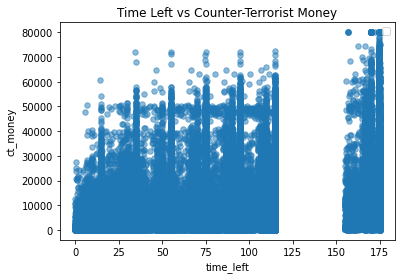

No handles with labels found to put in legend.


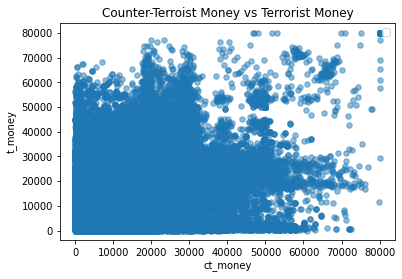

No handles with labels found to put in legend.


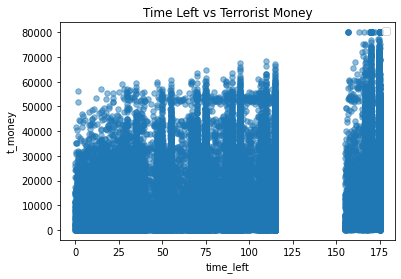

No handles with labels found to put in legend.


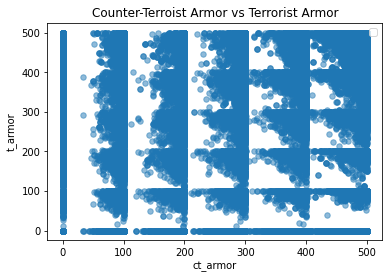

In [ ]:
plt.scatter(x = Xs['time_left'], y = Xs['ct_money'], s=30, alpha=0.5)
plt.ylabel('ct_money')
plt.xlabel('time_left')
plt.title('Time Left vs Counter-Terrorist Money')
plt.legend()
plt.show()

plt.scatter(x = Xs['ct_money'], y = Xs['t_money'], s=30, alpha=0.5)
plt.ylabel('t_money')
plt.xlabel('ct_money')
plt.title('Counter-Terroist Money vs Terrorist Money')
plt.legend()
plt.show()

plt.scatter(x = Xs['time_left'], y = Xs['t_money'], s=30, alpha=0.5)
plt.ylabel('t_money')
plt.xlabel('time_left')
plt.title('Time Left vs Terrorist Money')
plt.legend()
plt.show()

plt.scatter(x = Xs['ct_armor'], y = Xs['t_armor'], s=30, alpha=0.5)
plt.ylabel('t_armor')
plt.xlabel('ct_armor')
plt.title('Counter-Terroist Armor vs Terrorist Armor')
plt.legend()
plt.show()